In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#################################################
#################################################
############## The Map we use ###################
#################################################
#################################################

C:\Users\roelg\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\roelg\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


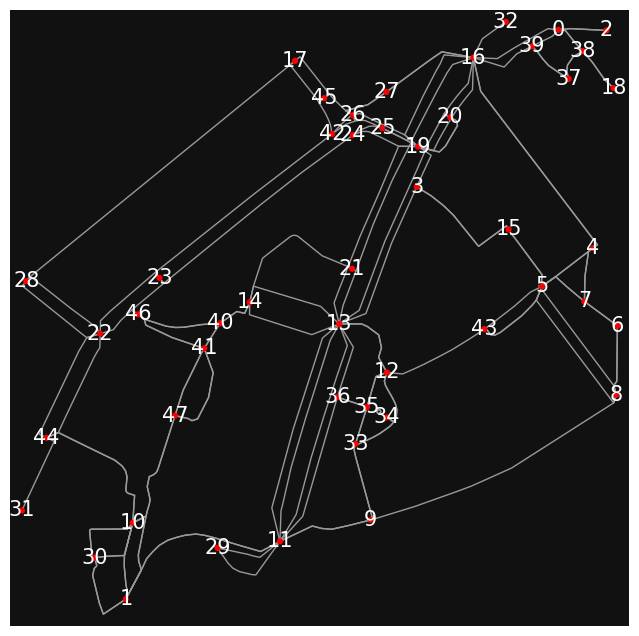

Number of nodes: 48
Number of edges: 135


In [3]:

# Load and simplify the graph
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands", dist=300)
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # Try 30-50 meters to cover roundabout radius
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Plot the graph and capture the figure and axis objects
fig, ax = ox.plot_graph(G, node_size=20, node_color='red', show=False, close=False)

# Extract node positions from the graph (using 'x' and 'y' attributes)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Draw node labels (node identifiers)
nx.draw_networkx_labels(G, pos=node_positions, ax=ax, font_size=15, font_color='White')

# Show the plot with labels
plt.show()

# Optionally, print node and edge counts
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [74]:

#################################################
#################################################
########## Analysis Normal Scenario #############
#################################################
#################################################


In [76]:
######## Average shortest path length ###########
# Lecture 2b

G_u = G.to_undirected()
avg_path_length = nx.average_shortest_path_length(G_u)
print("Average shortest path length (largest connected component):", avg_path_length)


Average shortest path length (largest connected component): 3.9326241134751774


Shortest Path Length from 11 to 16: 4
Shortest Path Length:from 16 to 11: 4
Shortest Path Length:from 12 to 14: 2
Shortest Path Length:from 14 to 12: 2


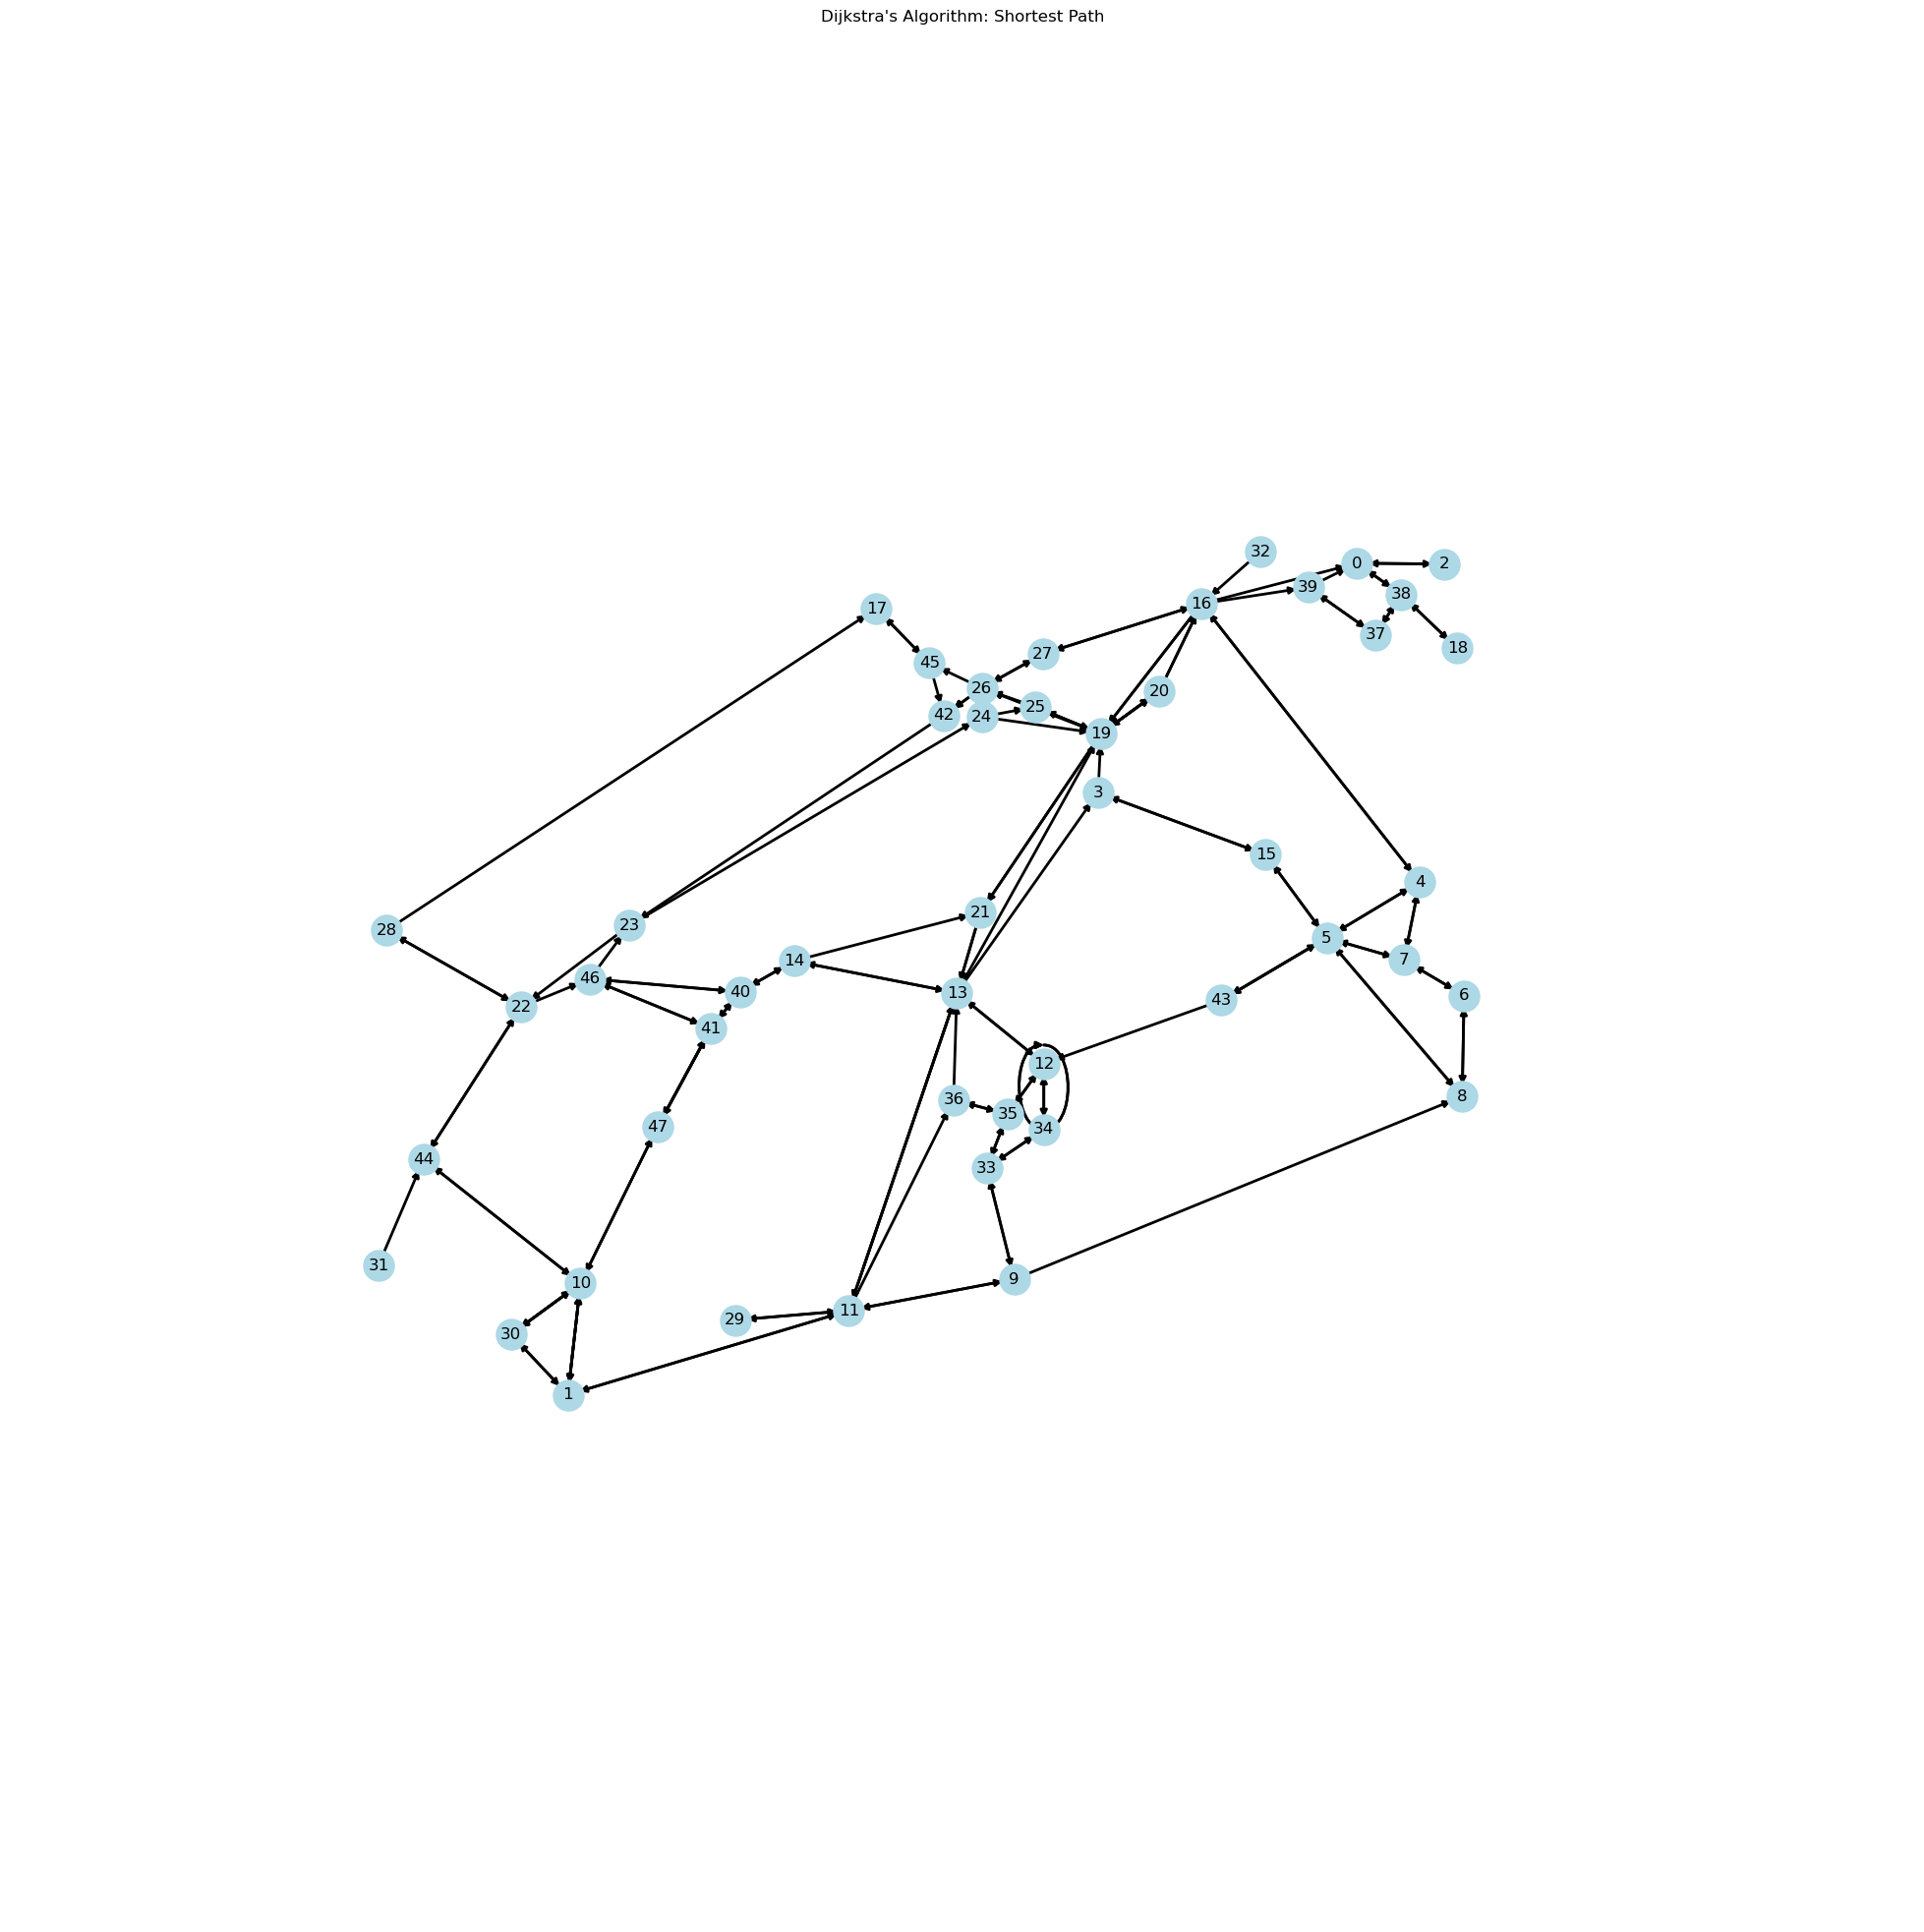

In [80]:
################ Dijkstra ############### 
# Lecture 1b?

Dijkstra = nx.all_pairs_dijkstra_path_length(G, cutoff=None, weight='weight')
list(Dijkstra)

length = nx.dijkstra_path_length(G, source=11, target=16)
length_2 = nx.dijkstra_path_length(G, source=16, target=11)
length_3 = nx.dijkstra_path_length(G, source=12, target=14)
length_4 = nx.dijkstra_path_length(G, source=14, target=12)
print("Shortest Path Length from 11 to 16:", length)
print("Shortest Path Length:from 16 to 11:", length_2)
print("Shortest Path Length:from 12 to 14:", length_3)
print("Shortest Path Length:from 14 to 12:", length_4)

pos=node_positions

# Draw the base graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title("Dijkstra's Algorithm: Shortest Path")
plt.axis('off')
plt.show()





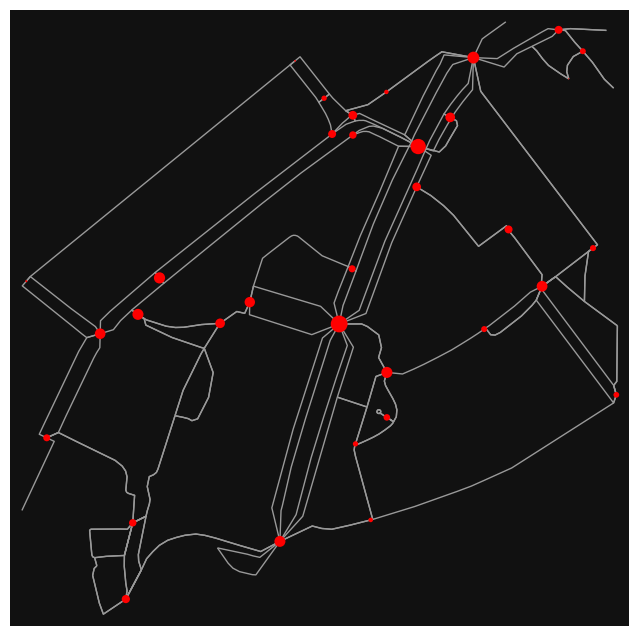

Aantal knooppunten: 48
Aantal edges: 135
    Betweenness Centrality
13                0.367715
19                0.304348
16                0.181776
23                0.163275
12                0.159112
46                0.158649
11                0.156337
5                 0.150324
22                0.146161
14                0.140611
20                0.121184
40                0.120259
26                0.099445
3                 0.098057
1                 0.087419
0                 0.082794
42                0.082331
15                0.082331
24                0.071693
10                0.071693
21                0.066142
44                0.063367
34                0.055967
4                 0.048104
43                0.047179
38                0.045791
8                 0.043016
45                0.037465
33                0.036540
9                 0.026827
27                0.025439
28                0.005550
17                0.003700
37                0.001850
41            

In [33]:
############### Betweenness centrality ##################
# Lecture 2a?


# Bereken de betweenness centrality voor elke node (optioneel met gewicht op 'length')
bc = nx.betweenness_centrality(G, weight='length')

# Bepaal de node sizes door de betweenness centrality waarden te schalen
# Pas de schaalfactor aan om de knoopgrootte naar wens te regelen
node_sizes = [bc[node] * 400 for node in G.nodes()]

# Plot de graph met node sizes gebaseerd op betweenness centrality
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

#Visualizing Betweenness
#node_colors = [betweenness[node] for node in G.nodes()]
#fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=50, edge_color="black", show=True)

import pandas as pd

# Create a DataFrame from the betweenness centrality dictionary
bc_df = pd.DataFrame.from_dict(bc, orient='index', columns=['Betweenness Centrality'])

# Optionally sort the table by centrality (highest first)
bc_df = bc_df.sort_values(by='Betweenness Centrality', ascending=False)

# Display the table
print(bc_df)

# (Optional) Save to CSV if you want
#bc_df.to_csv("betweenness_centrality.csv")

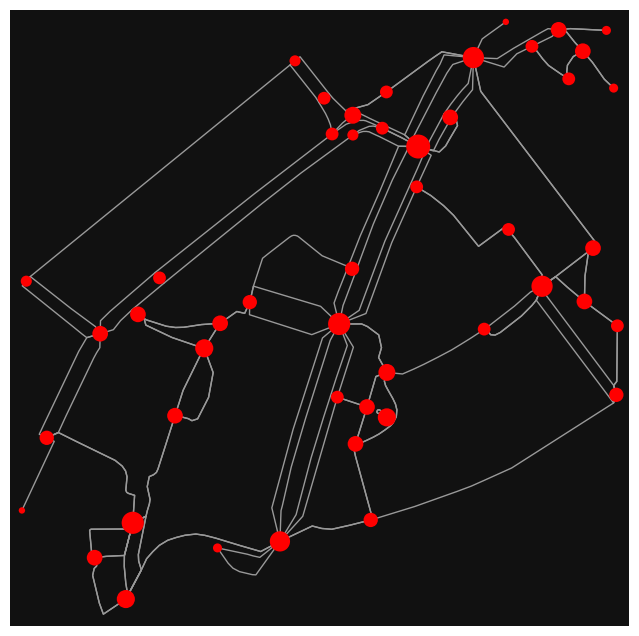

Aantal knooppunten: 48
Aantal edges: 135
Top 10 Nodes by degree centrality: [(19, 0.2978723404255319), (10, 0.2553191489361702), (13, 0.2553191489361702), (5, 0.23404255319148937), (16, 0.23404255319148937), (11, 0.2127659574468085), (1, 0.1702127659574468), (34, 0.1702127659574468), (41, 0.1702127659574468), (12, 0.14893617021276595)]
      Node ID  Degree Centrality
Rank                            
1          19           0.297872
2          10           0.255319
3          13           0.255319
4           5           0.234043
5          16           0.234043
6          11           0.212766
7           1           0.170213
8          34           0.170213
9          41           0.170213
10         12           0.148936


In [34]:
################ Degree Centrality ####################
# Lecture 2a 


# Bereken de degree centrality (geeft per node een waarde tussen 0 en 1)
dc = nx.degree_centrality(G)

# Bepaal de node sizes door de centrality waarden te schalen (pas de schaalfactor naar wens aan)
node_sizes = [dc[node] * 1000 for node in G.nodes()]

# Plot de graaf met de node sizes gebaseerd op degree centrality
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

# Sort top 10 #Code van anderen gebruikt. 
top_degree = sorted(dc.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by degree centrality:", top_degree)

# Convert top nodes to DataFrame
df = pd.DataFrame(top_degree, columns=["Node ID", "Degree Centrality"])

# Add ranking
df.index += 1  # Start index at 1
df.index.name = "Rank"

# Display table
print(df)

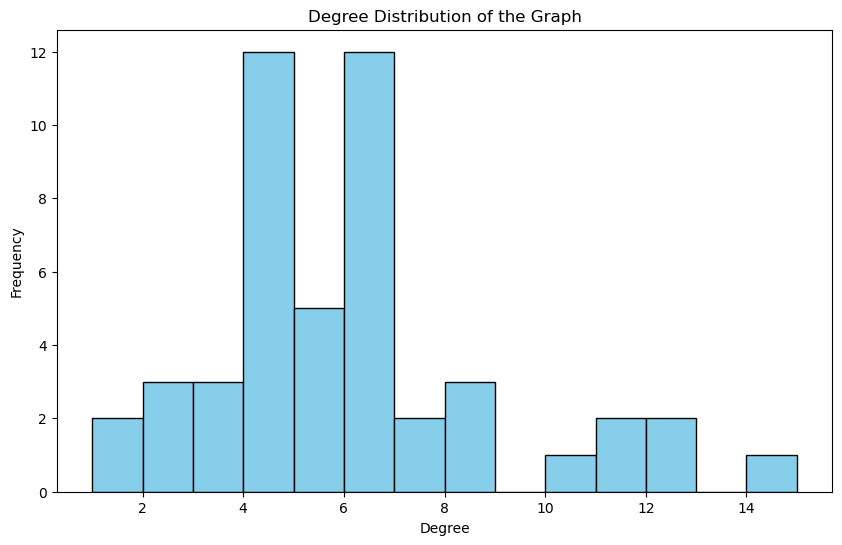

Min degree: 1
Max degree: 14
Nodes with degree 14: [19]


In [35]:
############### Degree Distribution Displayed in Graph ################
#Computes the degree for each node in the graph


degrees = [deg for node, deg in G.degree()]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) +2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()

# Optionally, print some basic stats about the degrees
print("Min degree:", min(degrees))
print("Max degree:", max(degrees))

# Code to identify nodes with a certain degree
target_degree = 14
# For an graph (G), extract nodes with the target degree
nodes_with_target_degree = [node for node, deg in G.degree() if deg == target_degree]

print(f"Nodes with degree {target_degree}: {nodes_with_target_degree}")

C:\Users\roelg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering (3 Clusters)\nTotal Distance to Centroids: 0.00')

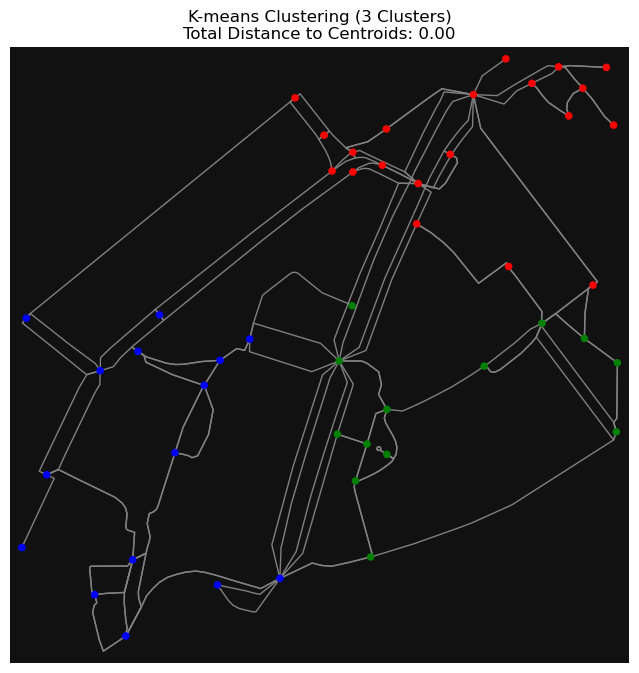

In [5]:
### K-means
# Lecture 6a & b

# K-Means will be used to analyse clusters.
#Import k-means algorithm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Extract node positions from the graph
node_ids = list(G.nodes())
node_coords = np.array([(G.nodes[n]['x'], G.nodes[n]['y']) for n in node_ids])


# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(node_coords)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_  # total distance to centroids

# Assign colors based on cluster label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
node_colors = [colors[label] for label in labels]

# Map nodes to cluster labels
node_cluster_labels = {node_ids[i]: labels[i] for i in range(len(node_ids))}

# Plot the clustered graph
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=30,
    edge_color='gray',
    show=False,
    close=False
)

# Plot centroids
for c in centroids:
    ax.plot(c[0], c[1])

plt.title(f"K-means Clustering (3 Clusters)\nTotal Distance to Centroids: {inertia:.2f}")

In [54]:
################## Local-Bridges ########################
# Code from lecture 2B  


# Codes shows to be not so relevant in our case. Local bridges are not possible in our graph. Bridges can work but make use of a simplification. 
bridges = set(nx.bridges(G_u))
print("bridges:", bridges)


bridges: {(11, 29), (16, 32), (18, 38), (0, 2), (31, 44)}


In [56]:
#################################################
#################################################
############ Disruption Scenario ################
#################################################
#################################################

C:\Users\roelg\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\roelg\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


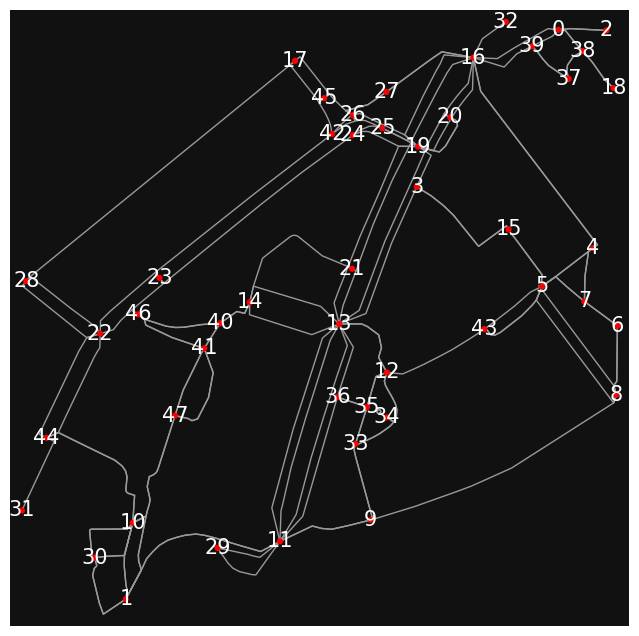

Number of nodes: 48
Number of edges: 135


In [7]:
############### Disruption Scenario map ######################


H = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands", dist=300)
H = ox.simplification.consolidate_intersections(
    H,
    tolerance=0.00013,  # Try 30-50 meters to cover roundabout radius
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Plot the graph and capture the figure and axis objects
fig, ax = ox.plot_graph(G, node_size=20, node_color='red', show=False, close=False)

# Extract node positions from the graph (using 'x' and 'y' attributes)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Draw node labels (node identifiers)
nx.draw_networkx_labels(H, pos=node_positions, ax=ax, font_size=15, font_color='White')

# Show the plot with labels
plt.show()

# Optionally, print node and edge counts
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [9]:
############### Node Removal ################


#Node identification
node_id=13
node_id2=19
#Node removal 
if node_id in H.nodes:
    H.remove_node(node_id)
    H.remove_node(node_id2)
    #G.remove_node(node_positions)
    print(f"Node {node_id} removed successfully.")
    print(f"Node {node_id2} removed successfully.")
else:
    print("Node not found.")

num_nodes = len(H.nodes)

# Remove a single node (e.g., the first one in the list)
#G.remove_node(nodes[0])
print("Number of nodes:", num_nodes)


Node 13 removed successfully.
Node 19 removed successfully.
Number of nodes: 46


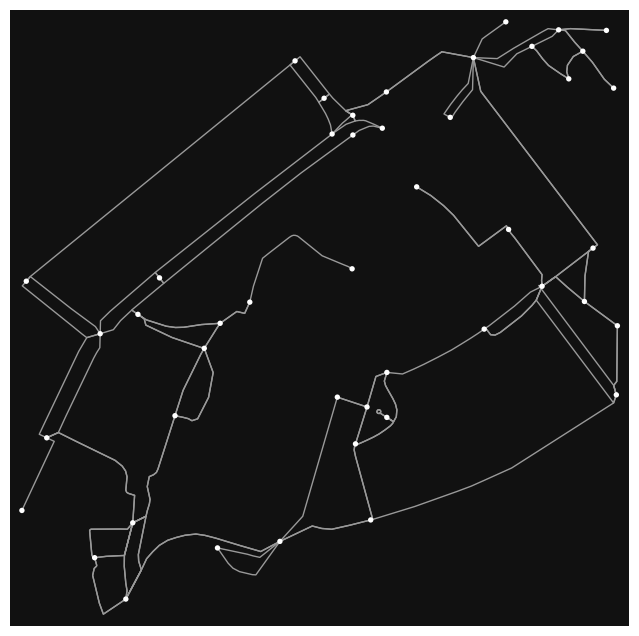

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
ox.plot_graph(H)

In [126]:
############### Average shortest path length #####################
# Lecture 2b

H_u = H.to_undirected()
avg_path_length = nx.average_shortest_path_length(H_u)
print("Average shortest path length (largest connected component):", avg_path_length)



Average shortest path length (largest connected component): 5.076328502415459


Shortest Path Length from 11 to 16: 5
Shortest Path Length:from 16 to 11: 5
Shortest Path Length:from 12 to 14: 9
Shortest Path Length:from 14 to 12: 9


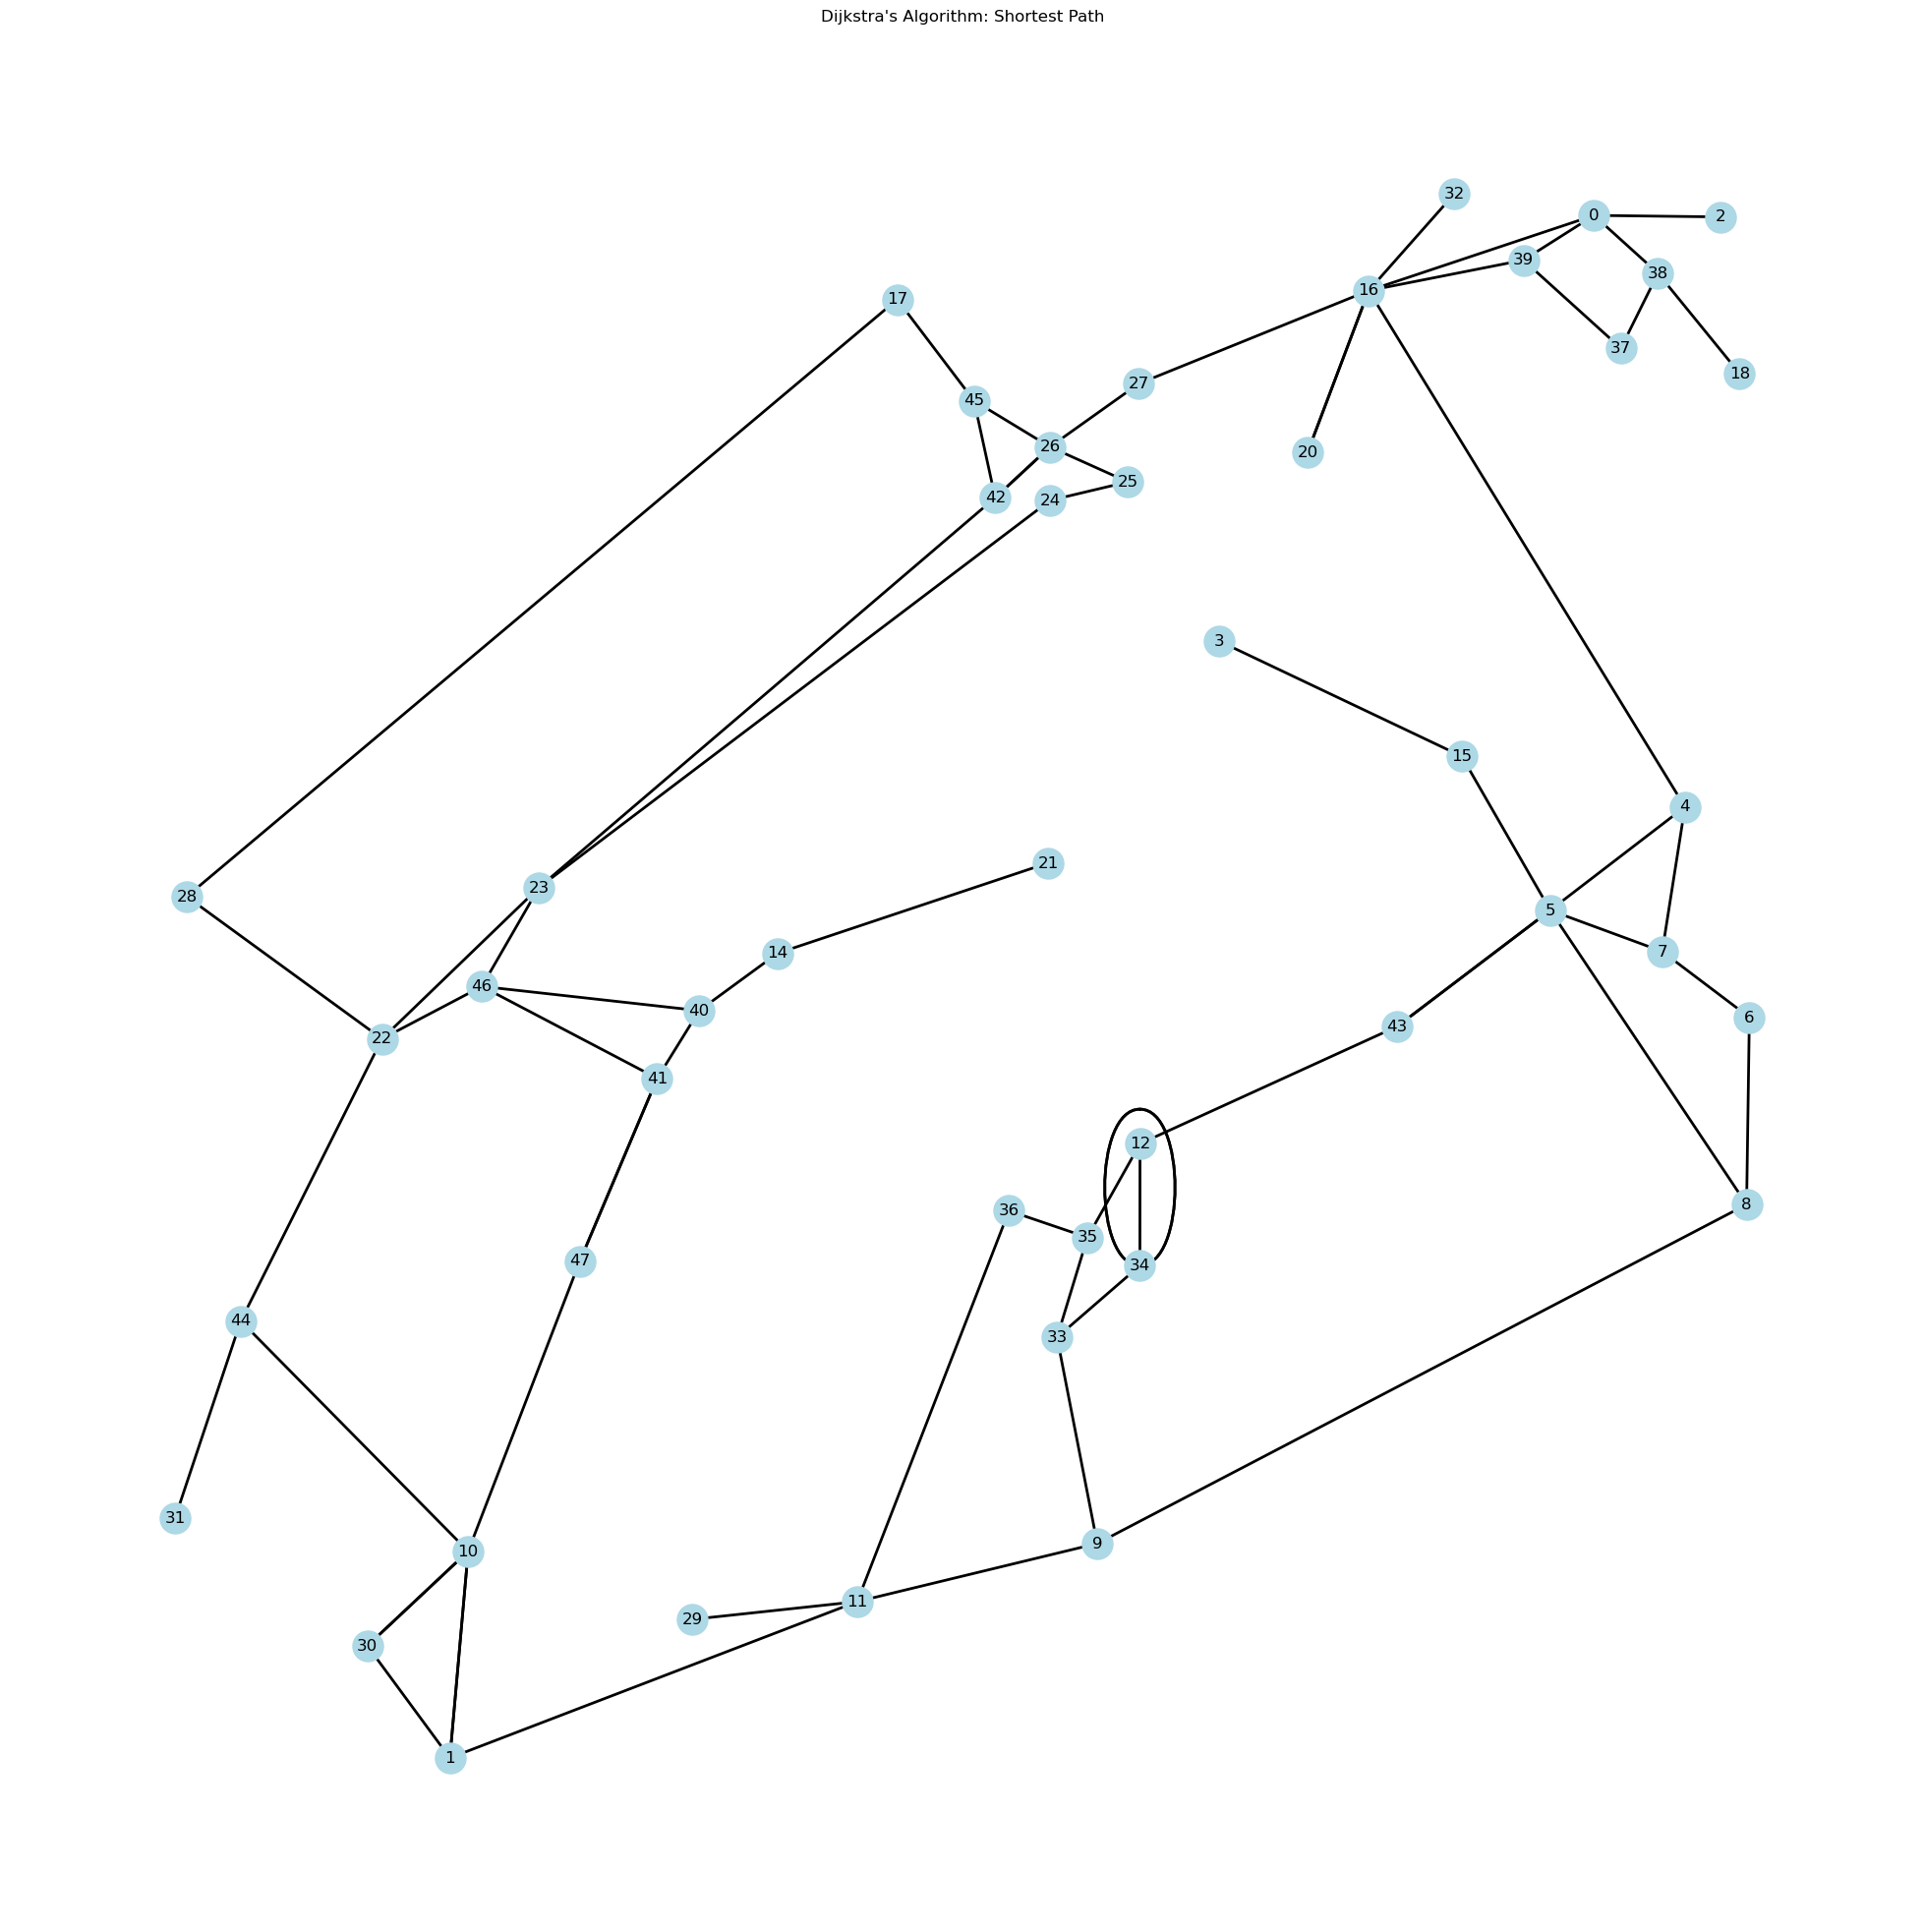

In [110]:
################ Dijkstra ############### 
# Lecture 1b?


Dijkstra = nx.all_pairs_dijkstra_path_length(H, cutoff=None, weight='weight')
list(Dijkstra)

length = nx.dijkstra_path_length(H, source=11, target=16) ########node 19 is deleted so what do we want here?
length_2 = nx.dijkstra_path_length(H, source=16, target=11)
length_3 = nx.dijkstra_path_length(H, source=12, target=14)
length_4 = nx.dijkstra_path_length(H, source=14, target=12)
print("Shortest Path Length from 11 to 16:", length)
print("Shortest Path Length:from 16 to 11:", length_2)
print("Shortest Path Length:from 12 to 14:", length_3)
print("Shortest Path Length:from 14 to 12:", length_4)

pos=node_positions

# Draw the base graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(H, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(H, pos, width=2)
nx.draw_networkx_labels(H, pos, font_size=12, font_color='black')

plt.title("Dijkstra's Algorithm: Shortest Path")
plt.axis('off')
plt.show()

In [112]:
############### Betweenness centrality ##################
# Lecture 2a?


# Bereken de betweenness centrality voor elke node (optioneel met gewicht op 'length')
bc = nx.betweenness_centrality(H, weight='length')

# Bepaal de node sizes door de betweenness centrality waarden te schalen
# Pas de schaalfactor aan om de knoopgrootte naar wens te regelen

node_sizes = [bc[node] * 400 for node in G.nodes()]

# Plot de graph met node sizes gebaseerd op betweenness centrality
ox.plot_graph(H, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

#Visualizing Betweenness
#node_colors = [betweenness[node] for node in G.nodes()]
#fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=50, edge_color="black", show=True)

import pandas as pd

# Create a DataFrame from the betweenness centrality dictionary
bc_df = pd.DataFrame.from_dict(bc, orient='index', columns=['Betweenness Centrality'])

# Optionally sort the table by centrality (highest first)
bc_df = bc_df.sort_values(by='Betweenness Centrality', ascending=False)

# Display the table
print(bc_df)

# (Optional) Save to CSV if you want
#bc_df.to_csv("betweenness_centrality.csv")

KeyError: 13

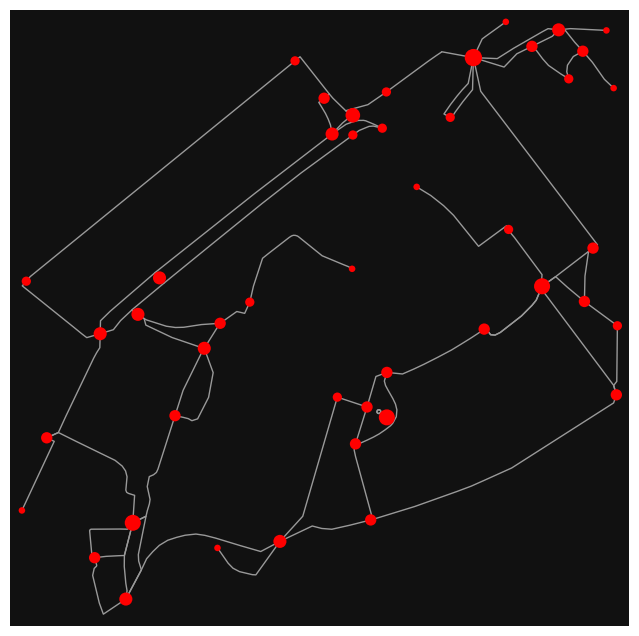

Aantal knooppunten: 46
Aantal edges: 68
Top 10 Nodes by degree centrality: [(16, 0.15555555555555556), (5, 0.13333333333333333), (10, 0.13333333333333333), (34, 0.13333333333333333), (26, 0.11111111111111112), (0, 0.08888888888888889), (1, 0.08888888888888889), (11, 0.08888888888888889), (22, 0.08888888888888889), (23, 0.08888888888888889)]
      Node ID  Degree Centrality
Rank                            
1          19           0.297872
2          10           0.255319
3          13           0.255319
4           5           0.234043
5          16           0.234043
6          11           0.212766
7           1           0.170213
8          34           0.170213
9          41           0.170213
10         12           0.148936


In [114]:
################ Degree Centrality ####################
# Lecture 2a 


# Bereken de degree centrality (geeft per node een waarde tussen 0 en 1)
dc_H = nx.degree_centrality(H)

# Bepaal de node sizes door de centrality waarden te schalen (pas de schaalfactor naar wens aan)
node_sizes = [dc_H[node] * 1000 for node in H.nodes()]

# Plot de graaf met de node sizes gebaseerd op degree centrality
ox.plot_graph(H, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

# Sort top 10 #Code van anderen gebruikt. 
top_degree = sorted(dc_H.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by degree centrality:", top_degree)

# Convert top nodes to DataFrame
df_H = pd.DataFrame(top_degree, columns=["Node ID", "Degree Centrality"])

# Add ranking
df_H.index += 1  # Start index at 1
df_H.index.name = "Rank"

# Display table
print(df)

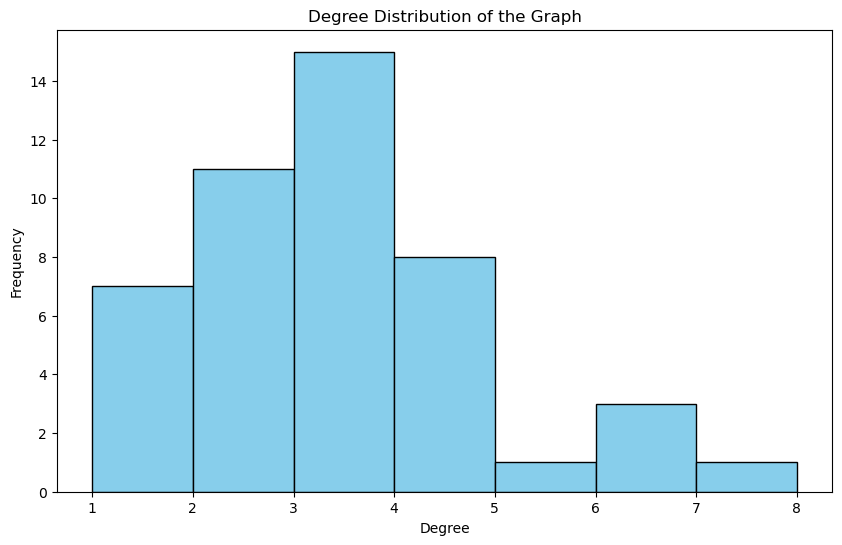

Min degree: 1
Max degree: 7
Nodes with degree 14: []


In [100]:
############### Degree Distribution Displayed in Graph ################
#Computes the degree for each node in the graph


degrees_H = [deg for node, deg in H.degree()]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees_H, bins=range(min(degrees_H), max(degrees_H) +2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()

# Optionally, print some basic stats about the degrees
print("Min degree:", min(degrees_H))
print("Max degree:", max(degrees_H))

# Code to identify nodes with a certain degree
target_degree = 14
# For an graph (H), extract nodes with the target degree
nodes_with_target_degree = [node for node, deg in H.degree() if deg == target_degree]

print(f"Nodes with degree {target_degree}: {nodes_with_target_degree}")

C:\Users\roelg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering (3 Clusters)\nTotal Distance to Centroids: 0.00')

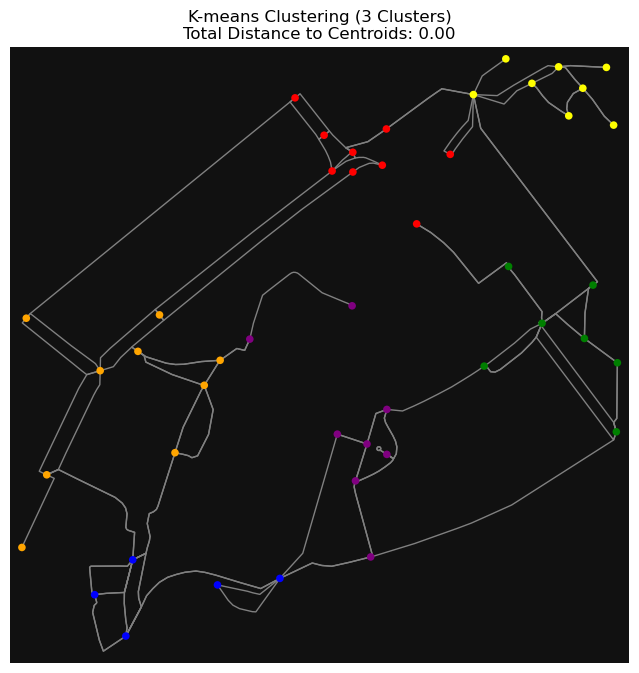

In [35]:
### K-means
# Lecture 6a & b

# K-Means will be used to analyse clusters.
#Import k-means algorithm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Extract node positions from the graph
node_ids = list(H.nodes())
node_coords = np.array([(H.nodes[n]['x'], H.nodes[n]['y']) for n in node_ids])


# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=6, random_state=0).fit(node_coords)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_  # total distance to centroids

# Assign colors based on cluster label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
node_colors = [colors[label] for label in labels]

# Map nodes to cluster labels
node_cluster_labels = {node_ids[i]: labels[i] for i in range(len(node_ids))}

# Plot the clustered graph
fig, ax = ox.plot_graph(
    H,
    node_color=node_colors,
    node_size=30,
    edge_color='gray',
    show=False,
    close=False
)

# Plot centroids
for c in centroids:
    ax.plot(c[0], c[1])

plt.title(f"K-means Clustering (3 Clusters)\nTotal Distance to Centroids: {inertia:.2f}")

In [116]:
################## Local-Bridges ########################
# Code from lecture 2B  


# Codes shows to be not so relevant in our case. Local bridges are not possible in our graph. Bridges can work but make use of a simplification. 
bridges = set(nx.bridges(H_u))
print("bridges:", bridges)

bridges: {(14, 40), (5, 15), (11, 29), (16, 32), (18, 38), (0, 2), (31, 44), (3, 15), (14, 21)}


In [ ]:

#################################################
#################################################
########## Analysis Solution Scenario ###########
#################################################
#################################################


C:\Users\roelg\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\roelg\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


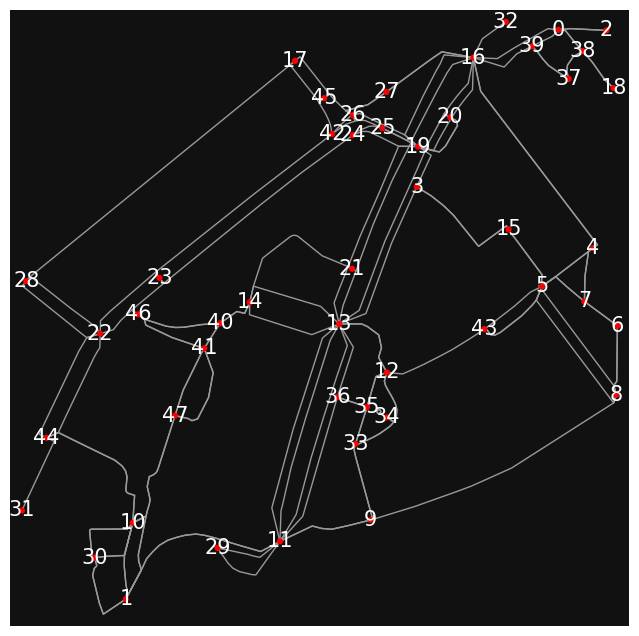

Number of nodes: 48
Number of edges: 135


In [37]:
# Load and simplify the graph
S = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands", dist=300)
S = ox.simplification.consolidate_intersections(
    S,
    tolerance=0.00013,  # Try 30-50 meters to cover roundabout radius
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Plot the graph and capture the figure and axis objects
fig, ax = ox.plot_graph(G, node_size=20, node_color='red', show=False, close=False)

# Extract node positions from the graph (using 'x' and 'y' attributes)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Draw node labels (node identifiers)
nx.draw_networkx_labels(S, pos=node_positions, ax=ax, font_size=15, font_color='White')

# Show the plot with labels
plt.show()

# Optionally, print node and edge counts
num_nodes = S.number_of_nodes()
num_edges = S.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Node 13 removed successfully.
Node 19 removed successfully.
Number of nodes: 46


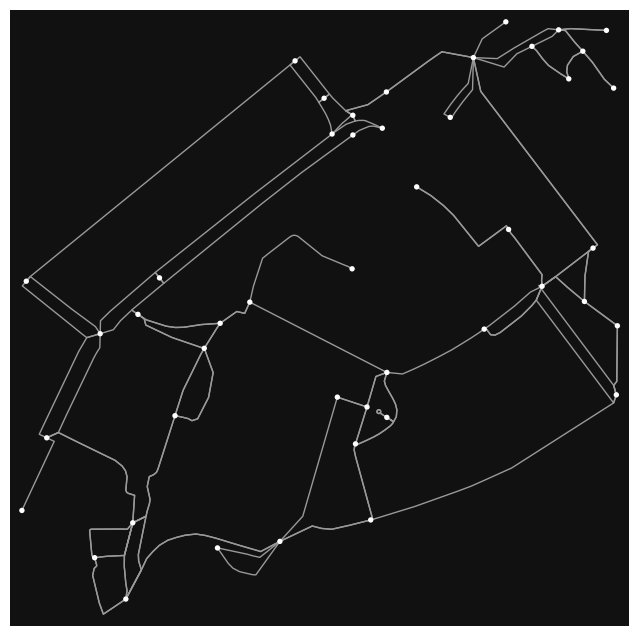

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [39]:
S.add_edge(12, 14)

node_id=13
node_id2=19
#Node removal 
if node_id in S.nodes:
    S.remove_node(node_id)
    S.remove_node(node_id2)
    #G.remove_node(node_positions)
    print(f"Node {node_id} removed successfully.")
    print(f"Node {node_id2} removed successfully.")
else:
    print("Node not found.")

num_nodes = len(S.nodes)

# Remove a single node (e.g., the first one in the list)
#G.remove_node(nodes[0])
print("Number of nodes:", num_nodes)

ox.plot_graph(S)

In [136]:
############### Average shortest path length #####################
# Lecture 2b

S_u = S.to_undirected()
avg_path_length = nx.average_shortest_path_length(S_u)
print("Average shortest path length (largest connected component):", avg_path_length)


Average shortest path length (largest connected component): 4.72463768115942


Shortest Path Length from 11 to 16: 5
Shortest Path Length:from 16 to 11: 8
Shortest Path Length:from 12 to 14: 1
Shortest Path Length:from 14 to 12: 9


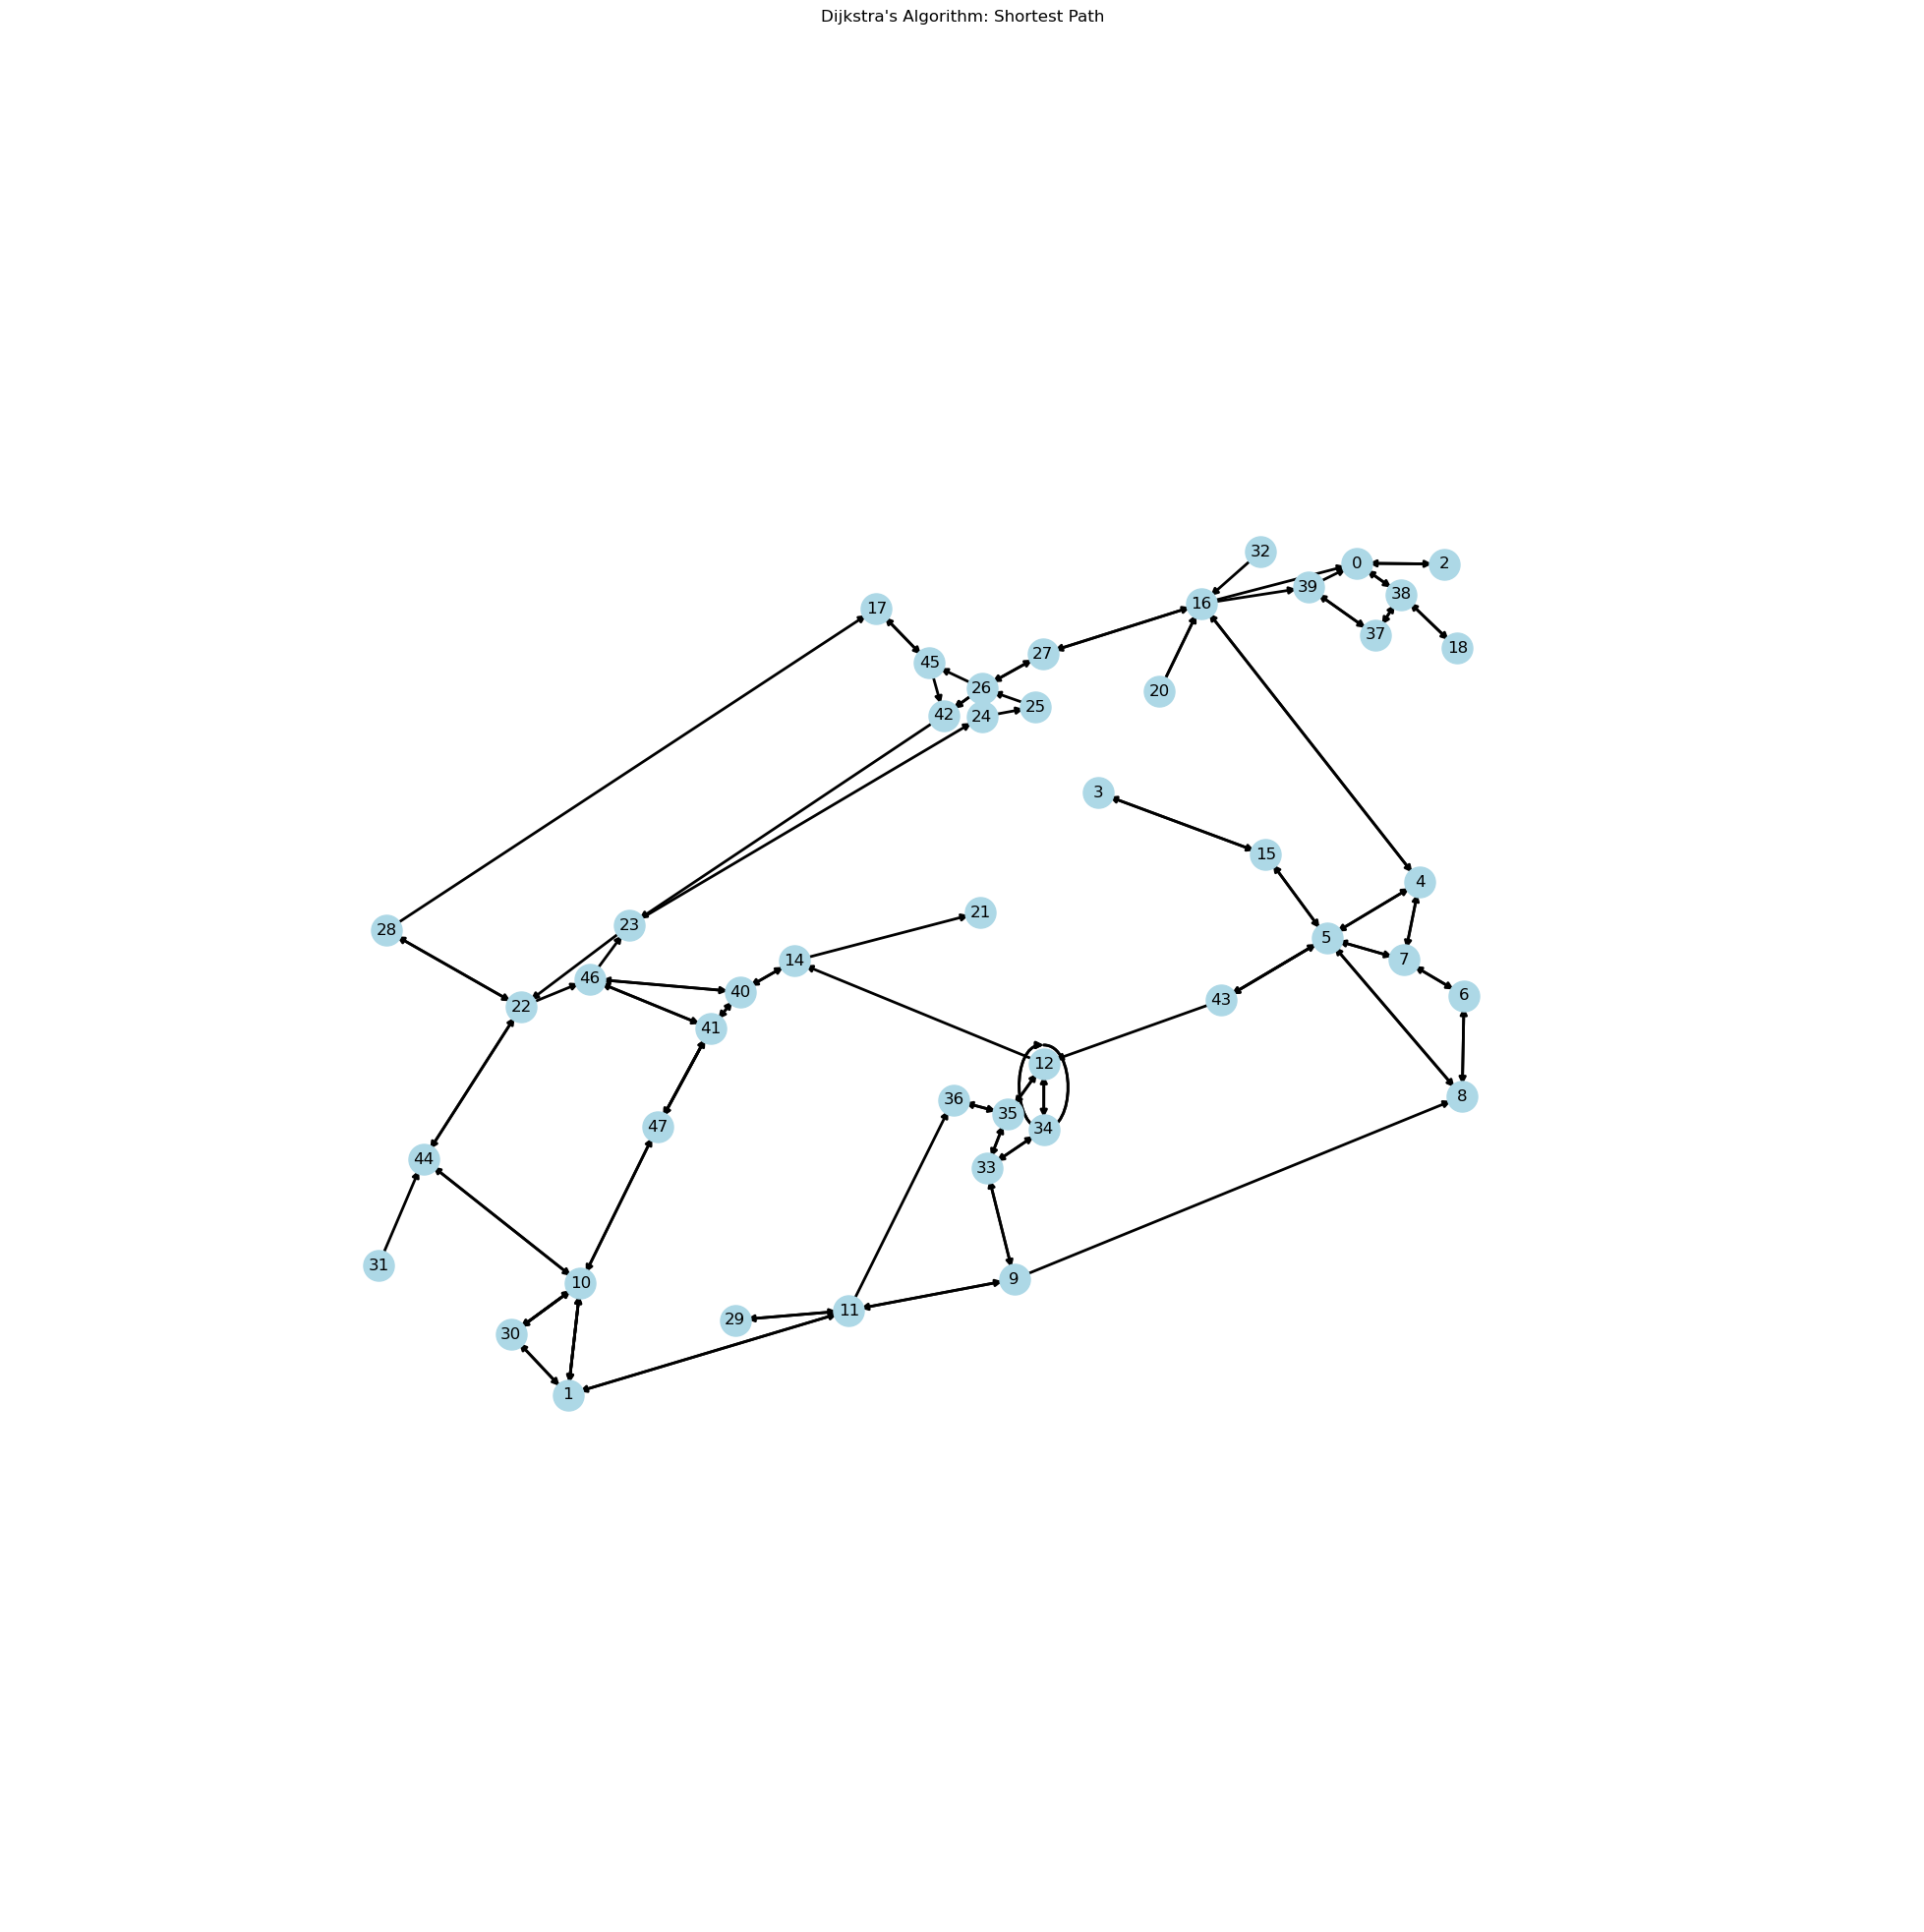

In [138]:
################ Dijkstra ############### 
# Lecture 1b?


Dijkstra = nx.all_pairs_dijkstra_path_length(S, cutoff=None, weight='weight')
list(Dijkstra)

length = nx.dijkstra_path_length(S, source=11, target=16) ########node 19 is deleted so what do we want here?
length_2 = nx.dijkstra_path_length(S, source=16, target=11)
length_3 = nx.dijkstra_path_length(S, source=12, target=14)
length_4 = nx.dijkstra_path_length(S, source=14, target=12)
print("Shortest Path Length from 11 to 16:", length)
print("Shortest Path Length:from 16 to 11:", length_2)
print("Shortest Path Length:from 12 to 14:", length_3)
print("Shortest Path Length:from 14 to 12:", length_4)

pos=node_positions

# Draw the base graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(S, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(S, pos, width=2)
nx.draw_networkx_labels(S, pos, font_size=12, font_color='black')

plt.title("Dijkstra's Algorithm: Shortest Path")
plt.axis('off')
plt.show()

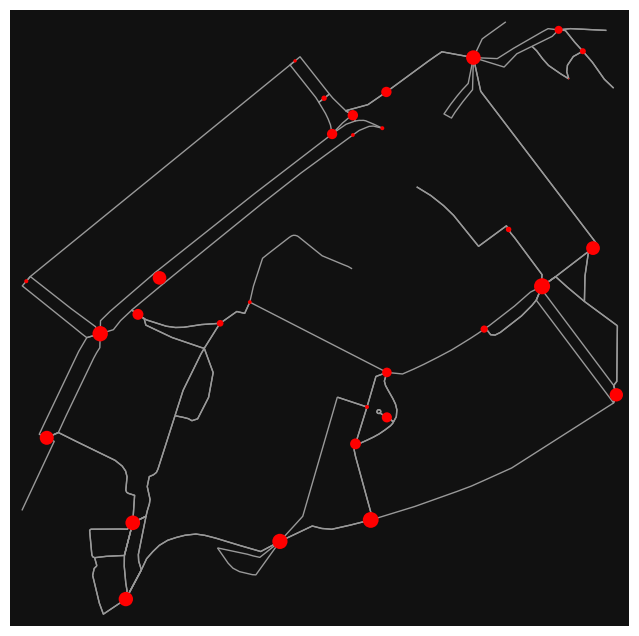

Aantal knooppunten: 46
Aantal edges: 111
    Betweenness Centrality
5                 0.333333
9                 0.324747
22                0.306566
11                0.300000
10                0.278283
16                0.275253
1                 0.267677
44                0.255051
4                 0.245960
23                0.240909
8                 0.231313
46                0.155051
33                0.152020
26                0.140909
27                0.138889
42                0.137879
34                0.132828
12                0.119192
0                 0.084343
43                0.068687
40                0.057576
38                0.046970
15                0.039394
45                0.037879
28                0.021212
35                0.020707
25                0.020707
14                0.019192
24                0.018687
17                0.014646
37                0.002020
29                0.000000
2                 0.000000
3                 0.000000
6             

In [142]:
############### Betweenness centrality ##################
# Lecture 2a?


# Bereken de betweenness centrality voor elke node (optioneel met gewicht op 'length')
bc = nx.betweenness_centrality(S, weight='length')

# Bepaal de node sizes door de betweenness centrality waarden te schalen
# Pas de schaalfactor aan om de knoopgrootte naar wens te regelen

node_sizes = [bc[node] * 400 for node in S.nodes()]

# Plot de graph met node sizes gebaseerd op betweenness centrality
ox.plot_graph(S, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = S.number_of_nodes()
num_edges = S.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

#Visualizing Betweenness
#node_colors = [betweenness[node] for node in G.nodes()]
#fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=50, edge_color="black", show=True)

import pandas as pd

# Create a DataFrame from the betweenness centrality dictionary
bc_df = pd.DataFrame.from_dict(bc, orient='index', columns=['Betweenness Centrality'])

# Optionally sort the table by centrality (highest first)
bc_df = bc_df.sort_values(by='Betweenness Centrality', ascending=False)

# Display the table
print(bc_df)

# (Optional) Save to CSV if you want
#bc_df.to_csv("betweenness_centrality.csv")

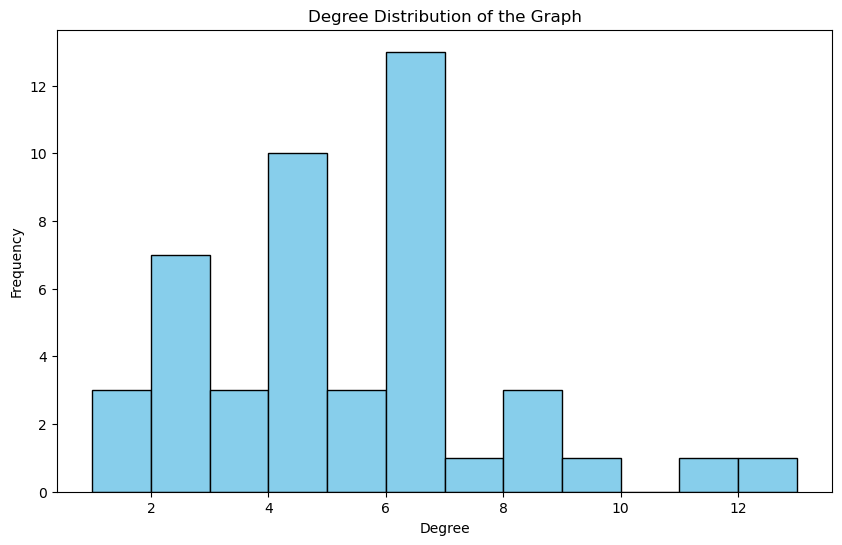

Min degree: 1
Max degree: 12
Nodes with degree 14: []


In [144]:
############### Degree Distribution Displayed in Graph ################
#Computes the degree for each node in the graph


degrees_S = [deg for node, deg in S.degree()]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees_S, bins=range(min(degrees_S), max(degrees_S) +2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()

# Optionally, print some basic stats about the degrees
print("Min degree:", min(degrees_S))
print("Max degree:", max(degrees_S))

# Code to identify nodes with a certain degree
target_degree = 14
# For an graph (H), extract nodes with the target degree
nodes_with_target_degree = [node for node, deg in S.degree() if deg == target_degree]

print(f"Nodes with degree {target_degree}: {nodes_with_target_degree}")

C:\Users\roelg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering (3 Clusters)\nTotal Distance to Centroids: 0.00')

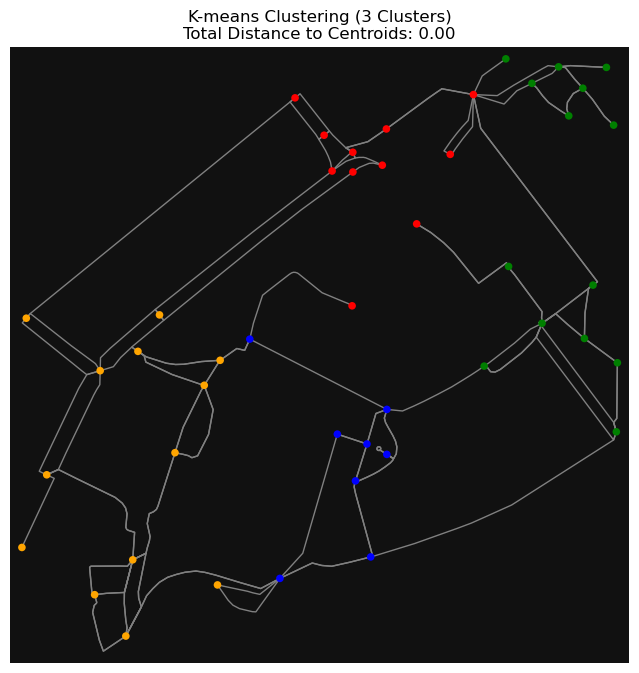

In [45]:
### K-means
# Lecture 6a & b

# K-Means will be used to analyse clusters.
#Import k-means algorithm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Extract node positions from the graph
node_ids = list(S.nodes())
node_coords = np.array([(S.nodes[n]['x'], S.nodes[n]['y']) for n in node_ids])


# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(node_coords)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_  # total distance to centroids

# Assign colors based on cluster label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
node_colors = [colors[label] for label in labels]

# Map nodes to cluster labels
node_cluster_labels = {node_ids[i]: labels[i] for i in range(len(node_ids))}

# Plot the clustered graph
fig, ax = ox.plot_graph(
    S,
    node_color=node_colors,
    node_size=30,
    edge_color='gray',
    show=False,
    close=False
)

# Plot centroids
for c in centroids:
    ax.plot(c[0], c[1])

plt.title(f"K-means Clustering (3 Clusters)\nTotal Distance to Centroids: {inertia:.2f}")

In [148]:
################## Local-Bridges ########################
# Code from lecture 2B  


# Codes shows to be not so relevant in our case. Local bridges are not possible in our graph. Bridges can work but make use of a simplification. 
bridges = set(nx.bridges(S_u))
print("bridges:", bridges)



bridges: {(5, 15), (11, 29), (16, 32), (18, 38), (0, 2), (31, 44), (3, 15), (14, 21)}


In [ ]:
#################################################
#################################################
############ OLD Experimental code ##############
#################################################
#################################################

C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


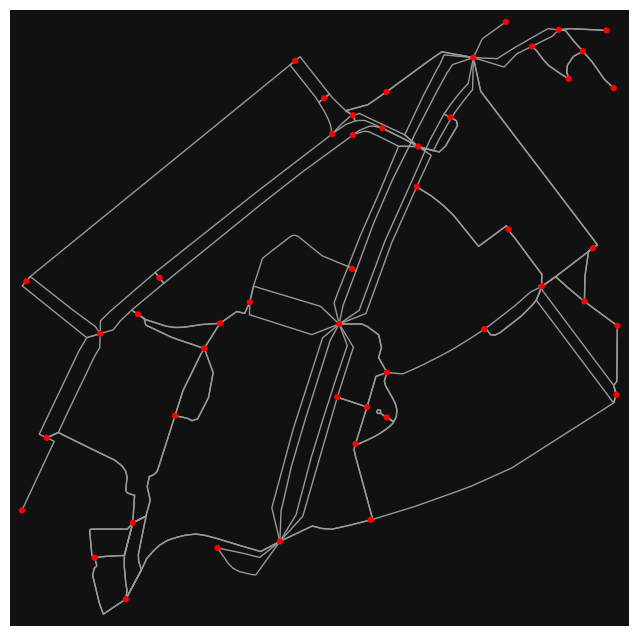

Number of nodes in the graph: 48
Aantal knooppunten: 48


In [3]:
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=300)
###################### Alternative adresss############################################
############G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=285)##################
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # Try 30-50 meters to cover roundabout radius
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)
ox.plot_graph(G, node_size=20,node_color='red')
num_nodes = len(G.nodes())
print(f"Number of nodes in the graph: {num_nodes}")

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Aantal knooppunten:", num_nodes)

C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


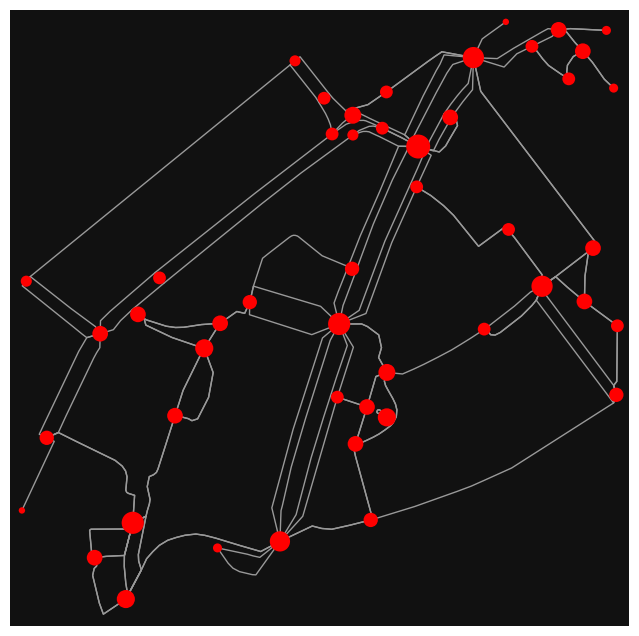

Aantal knooppunten: 48
Aantal edges: 135


In [87]:
#degree centrality, op basis van grootte

import osmnx as ox
import networkx as nx

# Haal de graaf op voor Jätkasaari
#G = ox.graph_from_place("Statenkwartier, Den Haag, Netherlands", network_type="drive")
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=300)
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # 30-50 meters om de roundabout radius te dekken
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Bereken de degree centrality (geeft per node een waarde tussen 0 en 1)
dc = nx.degree_centrality(G)

# Bepaal de node sizes door de centrality waarden te schalen (pas de schaalfactor naar wens aan)
node_sizes = [dc[node] * 1000 for node in G.nodes()]

# Plot de graaf met de node sizes gebaseerd op degree centrality
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")


C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


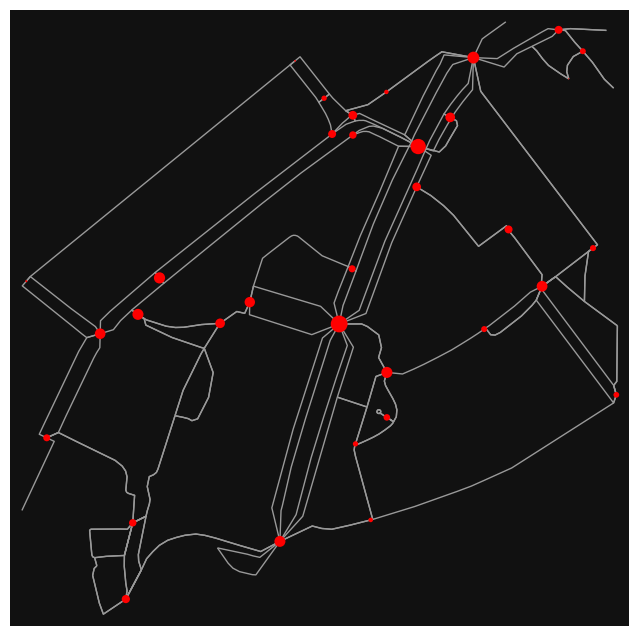

Aantal knooppunten: 48
Aantal edges: 135


In [99]:
#betweenness centrality


import osmnx as ox
import networkx as nx

# Haal de graaf op voor Jätkasaari
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=300)
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # 30-50 meters om de roundabout radius te dekken
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Bereken de betweenness centrality voor elke node (optioneel met gewicht op 'length')
bc = nx.betweenness_centrality(G, weight='length')

# Bepaal de node sizes door de betweenness centrality waarden te schalen
# Pas de schaalfactor aan om de knoopgrootte naar wens te regelen
node_sizes = [bc[node] * 400 for node in G.nodes()]

# Plot de graaf met node sizes gebaseerd op betweenness centrality
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


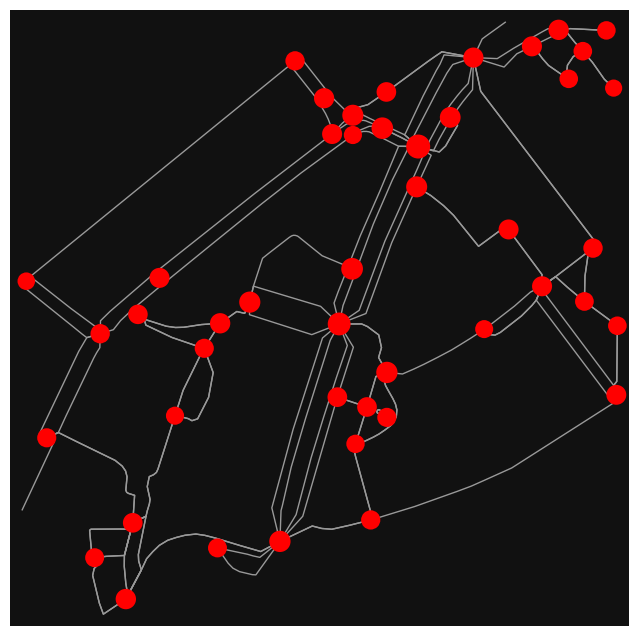

Number of nodes in the graph: 48
Aantal knooppunten: 48
Aantal edges: 135


In [105]:
#closeness centrality

import osmnx as ox
import networkx as nx

# Haal de graaf op voor Jätkasaari
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=300)
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # 30-50 meters om de roundabout radius te dekken
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Bereken de closeness centrality voor elke node
closeness = nx.closeness_centrality(G)

# Bepaal de node sizes door de closeness waarden te schalen (pas de schaalfactor naar wens aan)
node_sizes = [closeness[node]* 1000 for node in G.nodes()] # * [closeness[node] 
 
# Plot de graaf met de node sizes gebaseerd op closeness centrality
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes in the graph: {num_nodes}")
print("Aantal knooppunten:", num_nodes)
print("Aantal edges:", num_edges)

In [107]:
num_nodes = len(G.nodes)
num_edges = len(G.edges)
avg_degree = np.mean([deg for _, deg in G.degree()])
density = nx.density(G)

print(f"Nodes: {num_nodes}, Edges: {num_edges}")
print(f"Average Node Degree: {avg_degree:.2f}")
print(f"Network Density: {density:.4f}")

Nodes: 48, Edges: 135
Average Node Degree: 5.62
Network Density: 0.0598


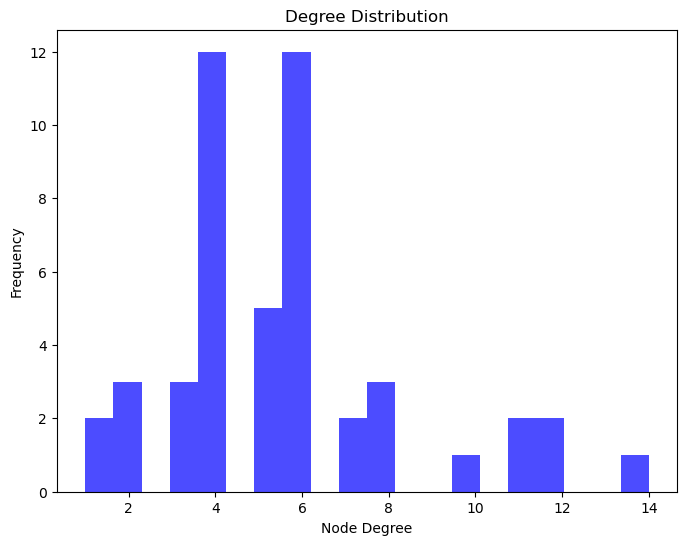

In [109]:

node_degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(8, 6))
plt.hist(node_degrees, bins=20, color='blue', alpha=0.7)
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()


In [17]:
#Dijkstra
Y = nx.all_pairs_dijkstra_path_length(G, cutoff=None, weight='weight')
list(Y)

[(0,
  {0: 0,
   13: 1,
   25: 1,
   24: 1,
   27: 2,
   1: 2,
   3: 2,
   4: 2,
   12: 3,
   16: 3,
   22: 3,
   10: 3,
   43: 4,
   30: 4,
   21: 4,
   8: 4,
   33: 5,
   31: 5,
   23: 5,
   9: 5,
   7: 5,
   38: 6,
   34: 6,
   28: 6,
   6: 6,
   37: 7,
   39: 7,
   29: 7,
   11: 7,
   35: 8,
   36: 8,
   40: 8,
   17: 8,
   32: 8,
   5: 8,
   44: 9,
   42: 9,
   41: 9,
   15: 9,
   46: 9,
   45: 10,
   26: 10,
   47: 11,
   18: 12,
   19: 13,
   2: 13,
   14: 14,
   20: 14}),
 (1,
  {1: 0,
   25: 1,
   12: 1,
   24: 1,
   0: 2,
   3: 2,
   43: 2,
   30: 2,
   22: 2,
   4: 2,
   13: 3,
   16: 3,
   33: 3,
   31: 3,
   10: 3,
   27: 3,
   21: 4,
   38: 4,
   34: 4,
   28: 4,
   8: 4,
   23: 5,
   37: 5,
   39: 5,
   29: 5,
   9: 5,
   7: 5,
   35: 6,
   36: 6,
   40: 6,
   17: 6,
   32: 6,
   6: 6,
   44: 7,
   42: 7,
   41: 7,
   15: 7,
   46: 7,
   11: 7,
   45: 8,
   26: 8,
   5: 8,
   47: 9,
   18: 10,
   19: 11,
   2: 11,
   14: 12,
   20: 12}),
 (2,
  {2: 0,
   18: 1,
   19: 2,

In [4]:
#Betweenness centrality

nx.betweenness_centrality(G) 

{2171847046: 0.41144781144781145,
 3065608679: 0.0,
 3065608681: 0.0,
 3065608683: 0.06127946127946128,
 3065608684: 0.013524130190796853,
 3065608686: 0.11784511784511785,
 3065608688: 0.009652076318742986,
 3065608689: 0.04607182940516273,
 3065608692: 0.0,
 3065608693: 0.024971941638608313,
 3065608695: 0.044725028058361385,
 3065608697: 0.1362065095398429,
 3065608698: 0.04078563411896746,
 3065608700: 0.01267115600448934,
 3065608701: 0.015039281705948374,
 3065608702: 0.03244668911335578,
 3065608703: 0.12150392817059484,
 3065608705: 0.12258136924803593,
 3065608707: 0.14006734006734006,
 3065621124: 0.1425364758698092,
 3434658163: 0.0,
 3434658169: 0.15151515151515152,
 3434658181: 0.06374298540965208,
 3434658182: 0.034438832772166104,
 3434658184: 0.12222783389450058,
 3434658187: 0.1437878787878788,
 3434658191: 0.17822671156004488,
 3434658206: 0.01762065095398429,
 3434658211: 0.013484848484848485,
 3434658213: 0.0,
 3434658215: 0.04175645342312009,
 3434658217: 0.0357968

In [5]:
#Degree centrality 
nx.degree_centrality(G) 

{2171847046: 0.10909090909090909,
 3065608679: 0.03636363636363636,
 3065608681: 0.03636363636363636,
 3065608683: 0.10909090909090909,
 3065608684: 0.10909090909090909,
 3065608686: 0.10909090909090909,
 3065608688: 0.10909090909090909,
 3065608689: 0.10909090909090909,
 3065608692: 0.03636363636363636,
 3065608693: 0.10909090909090909,
 3065608695: 0.10909090909090909,
 3065608697: 0.10909090909090909,
 3065608698: 0.10909090909090909,
 3065608700: 0.10909090909090909,
 3065608701: 0.10909090909090909,
 3065608702: 0.10909090909090909,
 3065608703: 0.10909090909090909,
 3065608705: 0.10909090909090909,
 3065608707: 0.05454545454545454,
 3065621124: 0.10909090909090909,
 3434658163: 0.01818181818181818,
 3434658169: 0.05454545454545454,
 3434658181: 0.09090909090909091,
 3434658182: 0.07272727272727272,
 3434658184: 0.10909090909090909,
 3434658187: 0.09090909090909091,
 3434658191: 0.10909090909090909,
 3434658206: 0.05454545454545454,
 3434658211: 0.05454545454545454,
 3434658213: 0

In [21]:
#Local bridges 

nx.local_bridges(G) #not implemented for directed type


NetworkXNotImplemented: not implemented for directed type

In [55]:
#Average path length 
nx.average_shortest_path_length(G) #graph is not strongly connected

NetworkXError: Graph is not strongly connected.

In [11]:
nx.closeness_centrality(G, u=None, distance=None, wf_improved=True)

{2171847046: 0.15877587758775877,
 3065608679: 0.08739162744612336,
 3065608681: 0.0971900826446281,
 3065608683: 0.09838259899609594,
 3065608684: 0.1051564828614009,
 3065608686: 0.11097829506134005,
 3065608688: 0.10246877722916062,
 3065608689: 0.11495601173020528,
 3065608692: 0.10022727272727273,
 3065608693: 0.10909090909090909,
 3065608695: 0.11967435549525103,
 3065608697: 0.14005557761016277,
 3065608698: 0.11662809917355374,
 3065608700: 0.10550239234449763,
 3065608701: 0.1087211093990755,
 3065608702: 0.11878787878787879,
 3065608703: 0.13419551160136933,
 3065608705: 0.14645080946450809,
 3065608707: 0.1431818181818182,
 3065621124: 0.12528409090909093,
 3434658163: 0.0,
 3434658169: 0.11023407729994558,
 3434658181: 0.09517129754518479,
 3434658182: 0.08575595527467186,
 3434658184: 0.1062010836845274,
 3434658187: 0.11748251748251749,
 3434658191: 0.13037694013303772,
 3434658206: 0.08575595527467186,
 3434658211: 0.09517129754518479,
 3434658213: 0.08739162744612336,
 